# Importación de librerías

In [17]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz

# Modelado
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from collections import Counter

# Definición de funciones

In [14]:
# Función para graficar matriz de confusión:
def draw_confusion_matrix(y_true, y_predict):
    matriz_conf = confusion_matrix(y_true, y_predict)
    _, ax = plt.subplots(figsize=(4, 4))
    for i in range(matriz_conf.shape[0]):
        for j in range(matriz_conf.shape[1]):
            if i == j:
                cell_color = "green"
            else:
                cell_color = "red"
            ax.add_patch(plt.Rectangle(
                (j, i), 1, 1, fill=True, color=cell_color))
            ax.text(j + 0.5, i + 0.5,
                    matriz_conf[i, j], ha='center', va='center', color='white', fontsize=14)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_xticks([0.5, 1.5])
    ax.xaxis.tick_top()
    ax.set_yticks([0.5, 1.5])
    ax.set_xticklabels(['Predijo 0', 'Predijo 1'])
    ax.set_yticklabels(['Es 0', 'Es 1'])
    ax.invert_yaxis()
    plt.show()

# Importación de los datos

In [5]:
# Importación de dataset concatenado (features numéricas y categóricas)
df_concat_a = pd.read_csv("../../data/csv/df_concat_a.csv")
df_concat_a.head()

,Unnamed: 0,sk_id_curr,target,auto_propio,casa_depto_propio,quien_acompañó,dia_inicio_proceso,telefono_trabajo,telefono_casa,telefono_casa2,...,monto_credito,edad_cliente,n_familiares,obs_30_circulo_social,solicitudes_al_bureau,n_hijos,ingresos_totales,prestamo_anual,precio_bienes,anios_empleado
0,0,100003,0,False,False,1,1,True,False,True,...,1.725533,0.172307,2.0,1.0,0.0,0,0.426787,0.592702,1.600949,-0.477823
1,1,100004,0,True,True,0,1,True,True,True,...,-1.152906,0.673812,1.0,0.0,0.0,0,-0.427191,-1.404683,-1.092160,-0.483056
2,2,100006,0,False,True,0,3,True,False,False,...,-0.711433,0.673812,2.0,2.0,1.0,0,-0.142532,0.177887,-0.653464,-0.464739
3,3,100007,0,False,True,0,4,True,False,False,...,-0.213720,0.924564,1.0,0.0,0.0,0,-0.199464,-0.361746,-0.068535,-0.464739
4,4,100008,0,False,True,1,3,True,True,True,...,-0.269635,0.172307,2.0,0.0,1.0,0,-0.294350,0.028230,-0.226953,-0.475206


In [115]:
# Eliminación de columnas unnamed y sk_id_curr
data = df_concat_a.drop(["Unnamed: 0", "sk_id_curr"], axis=1)
data.head()

,target,auto_propio,casa_depto_propio,quien_acompañó,dia_inicio_proceso,telefono_trabajo,telefono_casa,telefono_casa2,reg_residencia_diferente,reg_trabajo_diferente,...,monto_credito,edad_cliente,n_familiares,obs_30_circulo_social,solicitudes_al_bureau,n_hijos,ingresos_totales,prestamo_anual,precio_bienes,anios_empleado
0,0,False,False,1,1,True,False,True,False,False,...,1.725533,0.172307,2.0,1.0,0.0,0,0.426787,0.592702,1.600949,-0.477823
1,0,True,True,0,1,True,True,True,False,False,...,-1.152906,0.673812,1.0,0.0,0.0,0,-0.427191,-1.404683,-1.092160,-0.483056
2,0,False,True,0,3,True,False,False,False,False,...,-0.711433,0.673812,2.0,2.0,1.0,0,-0.142532,0.177887,-0.653464,-0.464739
3,0,False,True,0,4,True,False,False,False,False,...,-0.213720,0.924564,1.0,0.0,0.0,0,-0.199464,-0.361746,-0.068535,-0.464739
4,0,False,True,1,3,True,True,True,False,False,...,-0.269635,0.172307,2.0,0.0,1.0,0,-0.294350,0.028230,-0.226953,-0.475206


# Preparación de set de entrenamiento y de testeo

In [116]:
# Construcción de matriz de features y vector target
X = data.drop("target", axis=1)
y = data["target"]
print(X.shape, y.shape)

(199178, 62) (199178,)


In [117]:
# División de datos de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle=True, test_size=0.3, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(139424, 62) (59754, 62) (139424,) (59754,)


# Random Forest

In [118]:
# Modelo de Random Forest con 1000 estimadores
rf_clf = RandomForestClassifier(
    n_estimators=1000, n_jobs=-1, random_state=1234, oob_score=True, verbose=1)
rf_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  5.7min finished


RandomForestClassifier(n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=1234, verbose=1)

In [119]:
# Evaluación del desempeño en train
y_train_pred = rf_clf.predict(X_train)
metrics.accuracy_score(y_train, y_train_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   11.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   25.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   43.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   53.1s finished


1.0

In [120]:
# Evaluación del desempeño en test
y_test_pred = rf_clf.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   16.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   20.7s finished


0.9171268869029688

In [121]:
# Out of bag score
rf_clf.oob_score_

0.9151939407849438

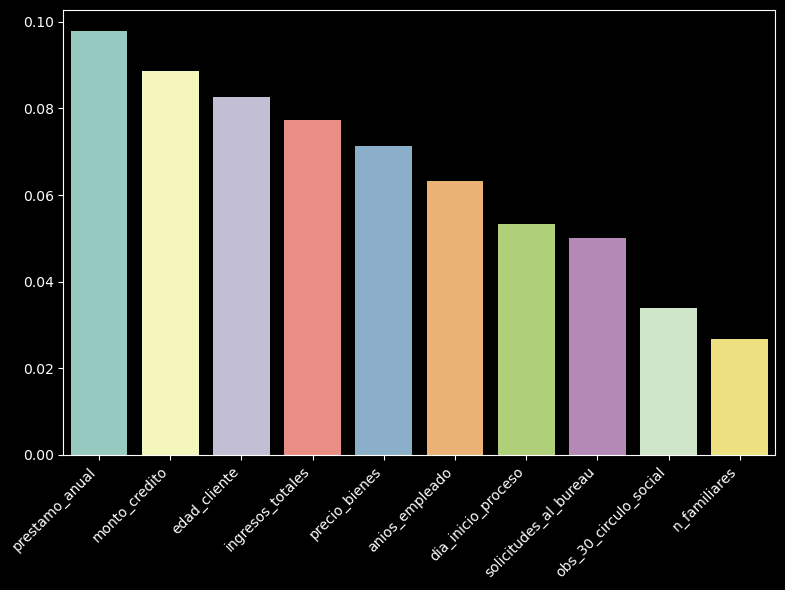

In [122]:
# Feature importances
importances = rf_clf.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]
top_10 = indices[:10]

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=columns[top_10], y=importances[top_10])
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# GridSearch + Random Forest 

In [123]:
# Definición de la grilla de hiperparámetros a validar
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    "min_samples_leaf": [0.1, 0.2, 0.5]
}

In [124]:
# Métrica de evaluación
scoring = 'accuracy'

In [125]:
# Creación de objeto GridSearchCV
rf_clf_cv = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator=rf_clf_cv, param_grid=param_grid, scoring=scoring, cv=3, verbose=1)

In [126]:
""" # Ajuste del objeto gridsearch a los datos de entrenamiento
grid_search.fit(X_train, y_train) """

' # Ajuste del objeto gridsearch a los datos de entrenamiento\ngrid_search.fit(X_train, y_train) '

In [127]:
""" # Mejores hiperparámetros y mejor score
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor score:", grid_search.best_score_) """

' # Mejores hiperparámetros y mejor score\nprint("Mejores hiperparámetros:", grid_search.best_params_)\nprint("Mejor score:", grid_search.best_score_) '

In [128]:
""" # Re-entrenamiento del modelo con los mejores hiperparámetros
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train) """

' # Re-entrenamiento del modelo con los mejores hiperparámetros\nbest_clf = grid_search.best_estimator_\nbest_clf.fit(X_train, y_train) '

In [129]:
""" # Testeo del modelo con los mejores hiperparámetros con los datos de test
accuracy = best_clf.score(X_test, y_test)
print("Testing accuracy:", accuracy) """

' # Testeo del modelo con los mejores hiperparámetros con los datos de test\naccuracy = best_clf.score(X_test, y_test)\nprint("Testing accuracy:", accuracy) '

# RandomizedSearch + Random Forest con balance de clases pasado como parámetro

In [130]:
# Definición de la grilla de hiperparámetros a validar
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    "min_samples_leaf": [0.1, 0.2, 0.5],
    "class_weight": ["balanced", "balanced_subsample"]
}

In [131]:
# Métrica de evaluación
scoring = 'accuracy'

In [132]:
# Creación de objeto RandomizedSearch
rf_clf_rs = RandomForestClassifier()
rand_search = RandomizedSearchCV(
    rf_clf_rs, param_grid, random_state=0, scoring=scoring)

In [133]:
# Ajuste del objeto randomizedsearch a los datos de entrenamiento
rand_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [0.1, 0.2, 0.5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 1000]},
                   random_state=0, scoring='accuracy')

In [134]:
# Mejores hiperparámetros y mejor score
print("Mejores hiperparámetros:", rand_search.best_params_)
print("Mejor score:", rand_search.best_score_)

Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 0.5, 'max_depth': 30, 'class_weight': 'balanced'}
Mejor score: 0.7491118177108489


In [135]:
# Re-entrenamiento del modelo con los mejores hiperparámetros
best_clf_rs = rand_search.best_estimator_
best_clf_rs.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=0.5, n_estimators=200)

In [153]:
y_test_pred = best_clf_rs.predict(X_test)

In [136]:
# Testeo del modelo con los mejores hiperparámetros con los datos de test
accuracy = best_clf_rs.score(y_test, )
print("Testing accuracy:", accuracy)

Testing accuracy: 0.08287311309703116


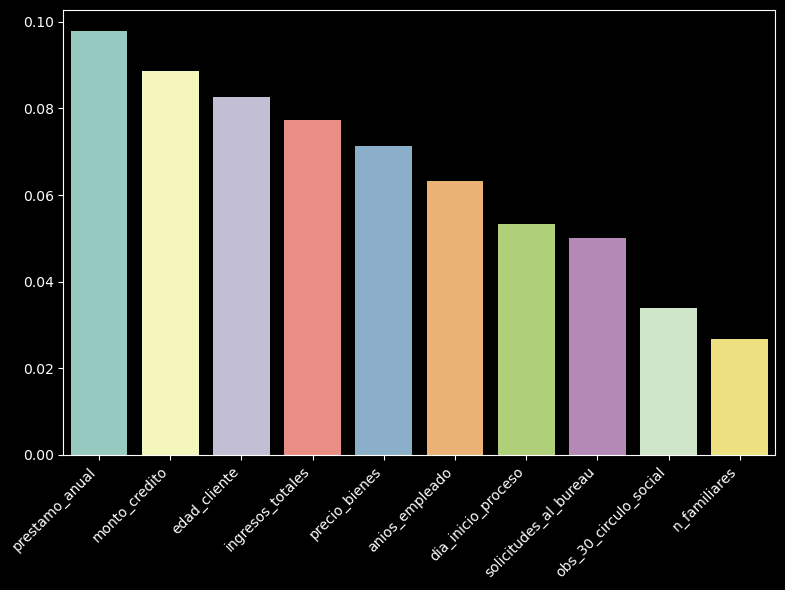

In [137]:
# Feature importances
importances_rs = best_clf_rs.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]
top_10 = indices[:10]

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=columns[top_10], y=importances[top_10])
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [138]:
# Matriz de confusión
y_pred = best_clf_rs.predict(X_test)
matriz_conf = metrics.confusion_matrix(
    y_test, y_pred, labels=best_clf_rs.classes_)
matriz_conf

array([[    0, 54802],
       [    0,  4952]], dtype=int64)

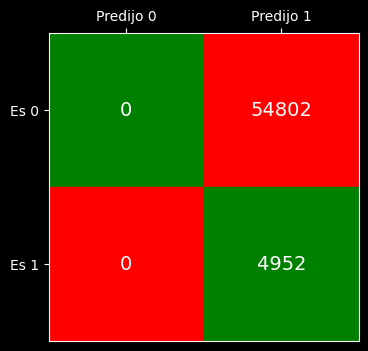

In [139]:
# Representación visual de matriz de confusión
draw_confusion_matrix(y_test, y_pred)

In [140]:
# Reporte de clasificación con balance de clases pasado como parámetro
print(classification_report(y_test, y_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           0        nan      0.00       nan     54802
           1       0.08      1.00      0.15      4952

    accuracy                           0.08     59754
   macro avg       0.08      0.50      0.15     59754
weighted avg       0.08      0.08      0.15     59754



# RandomizedSearch + Random Forest con balance de clases con subsampling

In [ ]:
# Preprocesamiento
# Balance de clases (undersampling u oversampling)
# Busqueda de hiperparámentros con grilla y validacion cruzada
# Entrenamiento con los mejores hiperparámetros y mejor modelo
# Predicciones en train y test
# Evaluación (métricas)
# Optativo: graficar
# AUC ROC Y AUC PR

In [6]:
# Construcción de matriz de features y vector target
X = df_concat_a.drop(["target", "Unnamed: 0", "sk_id_curr"], axis=1)
y = df_concat_a["target"]

In [7]:
# Undersampling
us = NearMiss()
X_us, y_us = us.fit_resample(X, y)

print("Distribución antes del resampling {}".format(Counter(y)))
print("Distribución después del resampling {}".format(Counter(y_us)))

Distribución antes del resampling Counter({0: 182399, 1: 16779})
Distribución después del resampling Counter({0: 16779, 1: 16779})


In [9]:
# División de datos de entrenamiento y testeo
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(
    X_us, y_us, shuffle=True, test_size=0.3, random_state=1234)
print(X_train_us.shape, X_test_us.shape, y_train_us.shape, y_test_us.shape)

(23490, 62) (10068, 62) (23490,) (10068,)


In [10]:
# Búsqueda de hiperparámetros
# Definición de la grilla de hiperparámetros a validar
param_grid = {
    'n_estimators': [250, 300, 350, 400],
    'max_depth': [None, 75, 80, 90],
    'min_samples_split': [0.003, 0.005, 0.01, 0.02],
    "min_samples_leaf": [0.001, 0.002, 0.003, 0.005]
}

# Métrica de evaluación
scoring = 'f1'

# Creación de objeto RandomizedSearch
rf_clf_us = RandomForestClassifier()
rand_search_us = RandomizedSearchCV(
    rf_clf_us, param_grid, random_state=123, scoring=scoring, cv=5, n_iter=5)

# Ajuste del objeto randomizedsearch a los datos de entrenamiento CON RESAMPLING
rand_search_us.fit(X_train_us, y_train_us)

# Mejores hiperparámetros y mejor score
print("Mejores hiperparámetros:", rand_search_us.best_params_)
print("Mejor score:", rand_search_us.best_score_)

Mejores hiperparámetros: {'n_estimators': 250, 'min_samples_split': 0.003, 'min_samples_leaf': 0.001, 'max_depth': 90}
Mejor score: 0.80044214147899


In [11]:
# Re-entrenamiento del modelo con los mejores hiperparámetros
best_clf_us = rand_search_us.best_estimator_
best_clf_us.fit(X_train_us, y_train_us)

RandomForestClassifier(max_depth=90, min_samples_leaf=0.001,
                       min_samples_split=0.003, n_estimators=250)

F1 score en datos de entrenamiento us: 0.8192970967037764


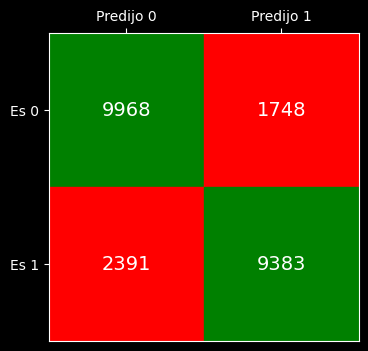

None
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     11716
           1       0.84      0.80      0.82     11774

    accuracy                           0.82     23490
   macro avg       0.82      0.82      0.82     23490
weighted avg       0.82      0.82      0.82     23490



In [15]:
# Performance del modelo con los datos de entrenamiento
y_train_pred_us = best_clf_us.predict(X_train_us)
print("F1 score en datos de entrenamiento us:",
      metrics.f1_score(y_train_us, y_train_pred_us))
print(draw_confusion_matrix(y_train_us, y_train_pred_us))
print(classification_report(y_train_us, y_train_pred_us, zero_division=np.nan))

In [22]:
# Cálculo de AUC-ROC y AUC-PR
roc_train_us = roc_auc_score(y_train_us, y_train_pred_us)
pr_train_us = average_precision_score(y_train_us, y_train_pred_us)
print(f"AUC-ROC para TRAIN US: {round(roc_train_us,3)}")
print(f"AUC-PR para TRAIN US: {round(pr_train_us,3)}")

AUC-ROC para TRAIN US: 0.824
AUC-PR para TRAIN US: 0.774


F1 score en datos de test: 0.7928652438395711


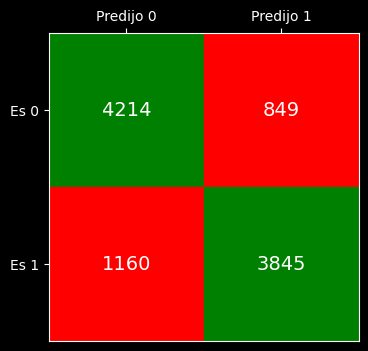

None
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      5063
           1       0.82      0.77      0.79      5005

    accuracy                           0.80     10068
   macro avg       0.80      0.80      0.80     10068
weighted avg       0.80      0.80      0.80     10068



In [16]:
# Performance del modelo con los datos de test
y_test_pred_us = best_clf_us.predict(X_test_us)
print("F1 score en datos de test:", metrics.f1_score(y_test_us, y_test_pred_us))
print(draw_confusion_matrix(y_test_us, y_test_pred_us))
print(classification_report(y_test_us, y_test_pred_us, zero_division=np.nan))

In [18]:
# Cálculo de AUC-ROC y AUC-PR
roc_test_us = roc_auc_score(y_test_us, y_test_pred_us)
pr_test_us = average_precision_score(y_test_us, y_test_pred_us)
print(f"AUC-ROC para TEST US: {round(roc_test_us,3)}")
print(f"AUC-PR para TEST US: {round(pr_test_us,3)}")

AUC-ROC para TEST US: 0.8
AUC-PR para TEST US: 0.744


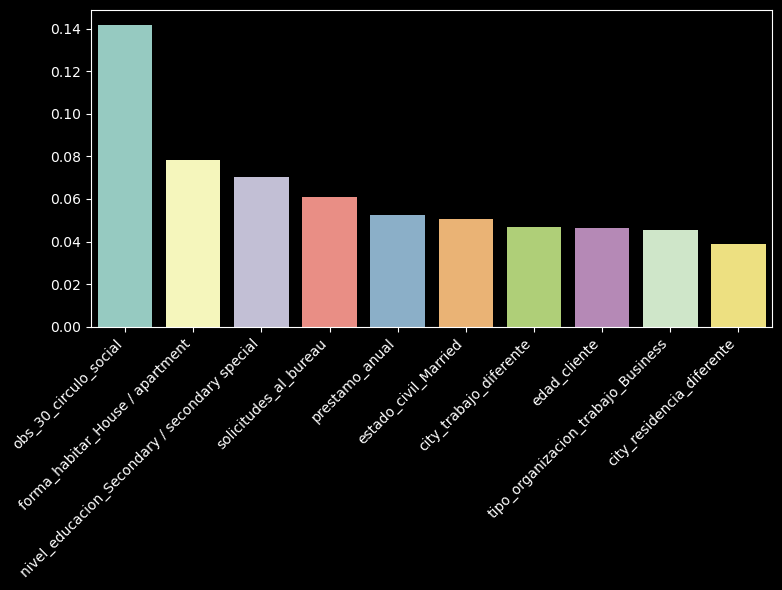

In [21]:
# Feature importances
importances_us = best_clf_us.feature_importances_
columns = X_train_us.columns
indices = np.argsort(importances_us)[::-1]
top_10 = indices[:10]

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=columns[top_10], y=importances_us[top_10])
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# RandomizedSearch + Random Forest con balance de clases con oversampling

In [23]:
# Construcción de matriz de features y vector target
X = df_concat_a.drop(["target", "Unnamed: 0", "sk_id_curr"], axis=1)
y = df_concat_a["target"]
print(X.shape, y.shape)

(199178, 62) (199178,)


In [24]:
# Oversampling con SMOTE
smote = SMOTE(random_state=123)
X_balanced, y_balanced = smote.fit_resample(X, y)
print("Distribución antes del oversampling {}".format(Counter(y)))
print("Distribución después del oversampling {}".format(Counter(y_balanced)))

Distribución antes del oversampling Counter({0: 182399, 1: 16779})
Distribución después del oversampling Counter({0: 182399, 1: 182399})


In [25]:
# División de datos de entrenamiento y testeo
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(
    X_balanced, y_balanced, shuffle=True, test_size=0.3, random_state=1234)
print(X_train_os.shape, X_test_os.shape, y_train_os.shape, y_test_os.shape)

(255358, 62) (109440, 62) (255358,) (109440,)


In [26]:
# Búsqueda de hiperparámetros
# Definición de la grilla de hiperparámetros a validar
param_grid = {
    'n_estimators': [270, 300, 330, 360],
    'max_depth': [None, 55, 65, 75],
    'min_samples_split': [0.015, 0.02, 0.025, 0.03],
    "min_samples_leaf": [0.02, 0.03, 0.05, 0.1]
}

# Métrica de evaluación
scoring = 'f1'

# Creación de objeto RandomizedSearch
rf_clf_os = RandomForestClassifier()
rand_search_os = RandomizedSearchCV(
    rf_clf_os, param_grid, random_state=123, scoring=scoring, cv=5, n_iter=5)

# Ajuste del objeto randomizedsearch a los datos de entrenamiento CON RESAMPLING
rand_search_os.fit(X_train_os, y_train_os)

# Mejores hiperparámetros y mejor score
print("Mejores hiperparámetros:", rand_search_os.best_params_)
print("Mejor score:", rand_search_os.best_score_)

Mejores hiperparámetros: {'n_estimators': 270, 'min_samples_split': 0.015, 'min_samples_leaf': 0.02, 'max_depth': 75}
Mejor score: 0.716708831092254


In [27]:
# Re-entrenamiento del modelo con los mejores hiperparámetros
best_clf_os = rand_search_os.best_estimator_
best_clf_os.fit(X_train_os, y_train_os)

RandomForestClassifier(max_depth=75, min_samples_leaf=0.02,
                       min_samples_split=0.015, n_estimators=270)

F1 score en datos de entrenamiento os: 0.7153348653194664


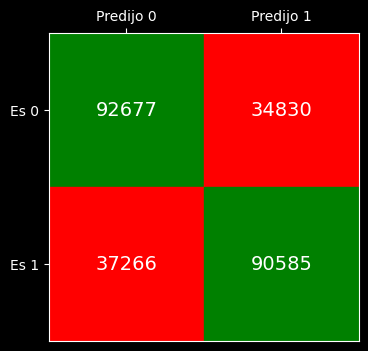

None
              precision    recall  f1-score   support

           0       0.71      0.73      0.72    127507
           1       0.72      0.71      0.72    127851

    accuracy                           0.72    255358
   macro avg       0.72      0.72      0.72    255358
weighted avg       0.72      0.72      0.72    255358



In [28]:
# Performance del modelo con los datos de entrenamiento
y_train_pred_os = best_clf_os.predict(X_train_os)
print("F1 score en datos de entrenamiento os:",
      metrics.f1_score(y_train_os, y_train_pred_os))
print(draw_confusion_matrix(y_train_os, y_train_pred_os))
print(classification_report(y_train_os, y_train_pred_os, zero_division=np.nan))

In [29]:
# Cálculo de AUC-ROC y AUC-PR
roc_train_os = roc_auc_score(y_train_os, y_train_pred_os)
pr_train_os = average_precision_score(y_train_os, y_train_pred_os)
print(f"AUC-ROC para TRAIN OS: {round(roc_train_os,3)}")
print(f"AUC-PR para TRAIN OS: {round(pr_train_os,3)}")

AUC-ROC para TRAIN OS: 0.718
AUC-PR para TRAIN OS: 0.658


F1 score en datos de test: 0.7133952918915911


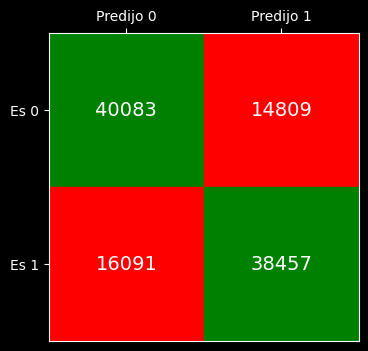

None
              precision    recall  f1-score   support

           0       0.71      0.73      0.72     54892
           1       0.72      0.71      0.71     54548

    accuracy                           0.72    109440
   macro avg       0.72      0.72      0.72    109440
weighted avg       0.72      0.72      0.72    109440



In [30]:
# Performance del modelo con los datos de test
y_test_pred_os = best_clf_os.predict(X_test_os)
print("F1 score en datos de test:", metrics.f1_score(y_test_os, y_test_pred_os))
print(draw_confusion_matrix(y_test_os, y_test_pred_os))
print(classification_report(y_test_os, y_test_pred_os, zero_division=np.nan))

In [31]:
# Cálculo de AUC-ROC y AUC-PR
roc_test_os = roc_auc_score(y_test_os, y_test_pred_os)
pr_test_os = average_precision_score(y_test_os, y_test_pred_os)
print(f"AUC-ROC para TEST OS: {round(roc_test_os,3)}")
print(f"AUC-PR para TEST OS: {round(pr_test_os,3)}")

AUC-ROC para TEST OS: 0.718
AUC-PR para TEST OS: 0.656


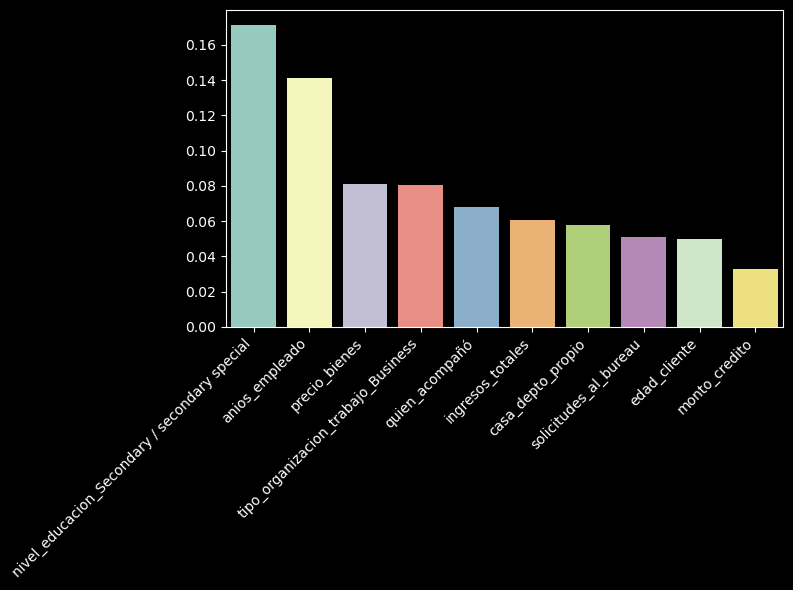

In [34]:
# Feature importances
importances_os = best_clf_os.feature_importances_
columns = X_train_os.columns
indices = np.argsort(importances_os)[::-1]
top_10 = indices[:10]

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=columns[top_10], y=importances_os[top_10])
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Random Forest con balance de clases con oversampling pero con parámetros obtenidos por subsampling

In [35]:
# Construcción de matriz de features y vector target
X = df_concat_a.drop(["target", "Unnamed: 0", "sk_id_curr"], axis=1)
y = df_concat_a["target"]
print(X.shape, y.shape)

(199178, 62) (199178,)


In [36]:
# Oversampling con SMOTE
smote = SMOTE(random_state=123)
X_balanced_2, y_balanced_2 = smote.fit_resample(X, y)
print("Distribución antes del oversampling {}".format(Counter(y)))
print("Distribución después del oversampling {}".format(Counter(y_balanced_2)))

Distribución antes del oversampling Counter({0: 182399, 1: 16779})
Distribución después del oversampling Counter({0: 182399, 1: 182399})


In [37]:
# División de datos de entrenamiento y testeo
X_train_os_2, X_test_os_2, y_train_os_2, y_test_os_2 = train_test_split(
    X_balanced_2, y_balanced_2, shuffle=True, test_size=0.3, random_state=1234)
print(X_train_os_2.shape, X_test_os_2.shape,
      y_train_os_2.shape, y_test_os_2.shape)

(255358, 62) (109440, 62) (255358,) (109440,)


In [38]:
# Re-entrenamiento del modelo con los mejores hiperparámetros OBTENIDOS EN UNDERSAMPLING
# Mejores hiperparámetros: {'n_estimators': 250, 'min_samples_split': 0.003, 'min_samples_leaf': 0.001, 'max_depth': 90}

best_clf_os_2 = RandomForestClassifier(
    n_estimators=250, min_samples_split=0.003, min_samples_leaf=0.001, max_depth=90)
best_clf_os_2.fit(X_train_os_2, y_train_os_2)

RandomForestClassifier(max_depth=90, min_samples_leaf=0.001,
                       min_samples_split=0.003, n_estimators=250)

F1 score en datos de entrenamiento os: 0.8017622901798175


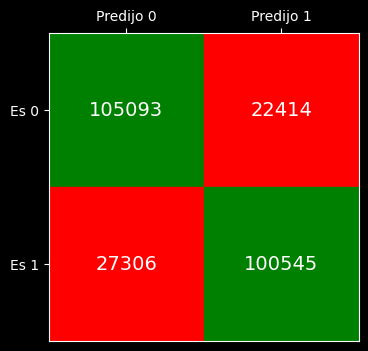

None
              precision    recall  f1-score   support

           0       0.79      0.82      0.81    127507
           1       0.82      0.79      0.80    127851

    accuracy                           0.81    255358
   macro avg       0.81      0.81      0.81    255358
weighted avg       0.81      0.81      0.81    255358



In [39]:
# Performance del modelo con los datos de entrenamiento
y_train_pred_os_2 = best_clf_os_2.predict(X_train_os_2)
print("F1 score en datos de entrenamiento os:",
      metrics.f1_score(y_train_os_2, y_train_pred_os_2))
print(draw_confusion_matrix(y_train_os_2, y_train_pred_os_2))
print(classification_report(y_train_os_2, y_train_pred_os_2, zero_division=np.nan))

In [40]:
# Cálculo de AUC-ROC y AUC-PR
roc_train_os_2 = roc_auc_score(y_train_os_2, y_train_pred_os_2)
pr_train_os_2 = average_precision_score(y_train_os_2, y_train_pred_os_2)
print(f"AUC-ROC para TRAIN OS: {round(roc_train_os_2,3)}")
print(f"AUC-PR para TRAIN OS: {round(pr_train_os_2,3)}")

AUC-ROC para TRAIN OS: 0.805
AUC-PR para TRAIN OS: 0.75


F1 score en datos de test: 0.7986198771354035


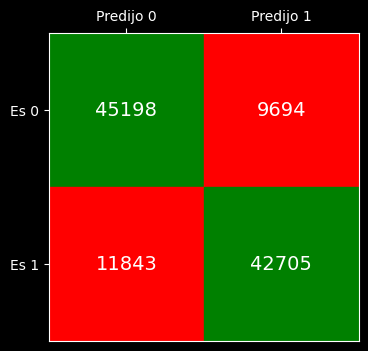

None
              precision    recall  f1-score   support

           0       0.79      0.82      0.81     54892
           1       0.81      0.78      0.80     54548

    accuracy                           0.80    109440
   macro avg       0.80      0.80      0.80    109440
weighted avg       0.80      0.80      0.80    109440



In [41]:
# Performance del modelo con los datos de test
y_test_pred_os_2 = best_clf_os_2.predict(X_test_os_2)
print("F1 score en datos de test:", metrics.f1_score(
    y_test_os_2, y_test_pred_os_2))
print(draw_confusion_matrix(y_test_os_2, y_test_pred_os_2))
print(classification_report(y_test_os_2, y_test_pred_os_2, zero_division=np.nan))

In [42]:
# Cálculo de AUC-ROC y AUC-PR
roc_test_os_2 = roc_auc_score(y_test_os_2, y_test_pred_os_2)
pr_test_os_2 = average_precision_score(y_test_os_2, y_test_pred_os_2)
print(f"AUC-ROC para TEST OS: {round(roc_test_os_2,3)}")
print(f"AUC-PR para TEST OS: {round(pr_test_os_2,3)}")

AUC-ROC para TEST OS: 0.803
AUC-PR para TEST OS: 0.746


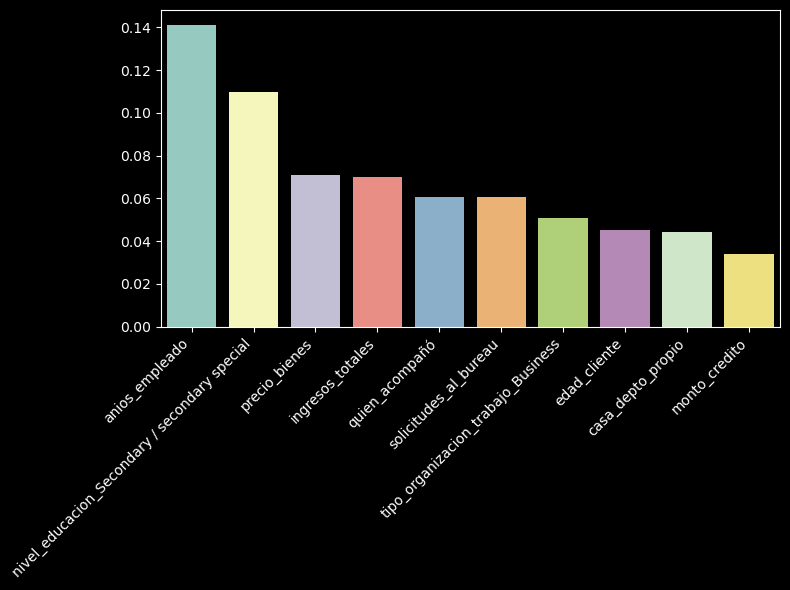

In [43]:
# Feature importances
importances_os_2 = best_clf_os_2.feature_importances_
columns = X_train_os_2.columns
indices = np.argsort(importances_os_2)[::-1]
top_10 = indices[:10]

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=columns[top_10], y=importances_os_2[top_10])
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

# DataFrame con resultados de la evaluación de modelos

In [53]:
# Dataframe con resultados de evaluación de modelos
result_dict = {
    "Modelo": ["US", "OS", "OS param US"],
    "F1 score en Train": [0.82, 0.71, 0.80],
    "F1 score en Test": [0.79, 0.71, 0.8],
    "Recall en 0 en Train": [0.85, 0.73, 0.82],
    "Recall en 1 en Train": [0.80, 0.71, 0.79],
    "Recall en 0 en Test": [0.83, 0.73, 0.82],
    "Recall en 1 en Test": [0.77, 0.71, 0.78],
    "AUC-ROC en Train": [0.824, 0.718, 0.805],
    "AUC-PR en Train": [0.774, 0.658, 0.75],
    "AUC-ROC en Test": [0.8, 0.718, 0.803],
    "AUC-PR en Test": [0.744, 0.656, 0.746]
}

result_df = pd.DataFrame(result_dict)
result_df = result_df.T
result_df.columns = result_df.iloc[0]
result_df = result_df[1:]
result_df = result_df.reset_index()
result_df

Modelo,index,US,OS,OS param US
0,F1 score en Train,0.82,0.71,0.8
1,F1 score en Test,0.79,0.71,0.8
2,Recall en 0 en Train,0.85,0.73,0.82
3,Recall en 1 en Train,0.8,0.71,0.79
4,Recall en 0 en Test,0.83,0.73,0.82
5,Recall en 1 en Test,0.77,0.71,0.78
6,AUC-ROC en Train,0.824,0.718,0.805
7,AUC-PR en Train,0.774,0.658,0.75
8,AUC-ROC en Test,0.8,0.718,0.803
9,AUC-PR en Test,0.744,0.656,0.746


In [52]:
result_df.columns

Index(['US', 'OS', 'OS param US'], dtype='object', name='Modelo')

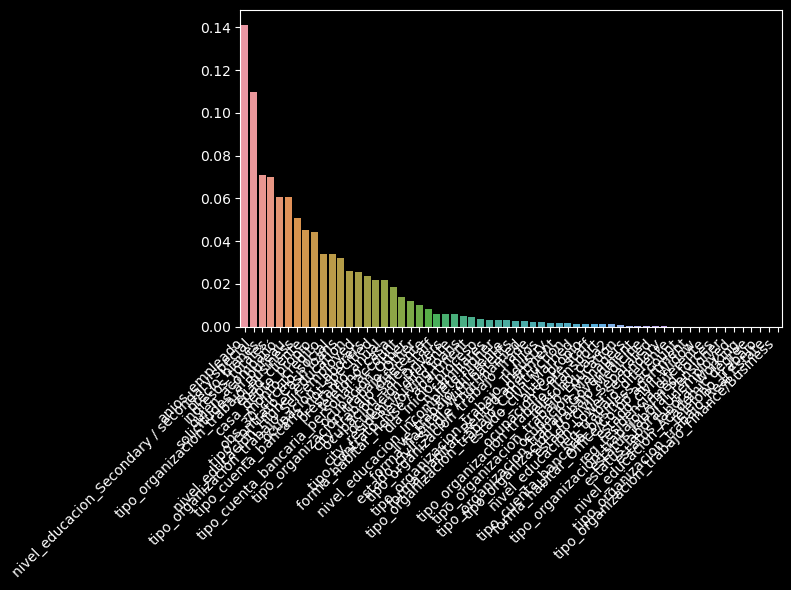

In [54]:
# Feature importances TODAS LAS VARIABLES EN MODELO OS_2
importances_os_2 = best_clf_os_2.feature_importances_
columns_2 = X_train_os_2.columns
indices_2 = np.argsort(importances_os_2)[::-1]
# top_10 = indices[:10]

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=columns[indices_2], y=importances_os_2[indices_2])
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()